## Car Auction Analysis

### 1. Exploratory Data Analysis (EDA) and Data Cleaning
   - **Statistical Analysis**: Conduct correlation analysis and descriptive statistics to understand data relationships and distributions.
   - **Visualization**: Create distribution visualizations to get a sense of the data spread and potential outliers.
   - **Outlier Handling**: Identify and remove or adjust outliers in the dataset.
   - **Missing Values**: Implement strategies for imputing missing values.

### 2. Feature Engineering
   - **Feature Scaling/Normalization**: Standardize the range of continuous input variables.
   - **Feature Selection**: Based on EDA, select relevant features that influence depreciation.
   - **Categorical Variable Encoding**: Convert categorical variables into a format that can be provided to ML models.
   - **Feature Transformation**: Transform features if needed to improve model performance.
   - **New Feature Creation**: Consider creating new features that might better capture the patterns in the data.

### 3. Datasets Generation
   - **Splitting Data**: Divide the dataset into training, validation, and test sets.

### 4. Model Fitting
   - **Random Forest and Neural Network Implementation**: Fit both models to the training data.
   - **Hyperparameter Tuning**: Use grid-search to fine-tune the models.
   - **Training Analysis**: Plot the loss function of the neural network over epochs and analyze the performance.

### 5. Model Evaluation
   - **Performance Metrics**: Evaluate models using metrics like MAE, RMSE, or others suitable for regression.
   - **Interpretability**: Ensure the chosen metrics are understandable to non-technical stakeholders.
   - **Detailed Analysis**: Create plot (actual vs. predicted) to understand model performance in depth.

### 6. Model Selection
   - **Performance Comparison**: Compare the random forest and neural network models based on the evaluation metrics.
   - **Best Model Identification**: Decide which model performs better for predicting car depreciation.

### 7. Model Explainability
   - **Feature Importance Analysis**: We will use Random Forest Feature Importance Method.

### 8. Other Models
   - **Linear Regression**: Implement linear regression and evaluate models using metrics like MAE, RMSE.
   - **KNN Model**: Implement KNN and evaluate models using metrics like MAE, RMSE.
   - **XGBoost**: Implement XGBoost and evaluate models using metrics like MAE, RMSE.

### Sub-questions Analysis
   - **Influence of Age and Mileage**: Analyze how these factors vary across makes and models.
   - **Geographical and Sales Trends Impact**: Examine the effect of location and sales data on depreciation rates.
   - **Transmission Types Influence**: Assess how different transmission types affect the depreciation of various models.

In [1]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'cleaned_car_prices.csv'
data = pd.read_csv(file_path)

In [3]:
# Since the dataset is large, we'll take a random sample of 50% records for analysis
# Not needed later
# car_prices_df = data.sample(frac=0.5, random_state=1)

### 1. Exploratory Data Analysis (EDA) and Data Cleaning By Blaise, Ziya and Kelvin

In [4]:
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
346635,2012,Mazda,Mazda3,i Touring,Sedan,automatic,jm1bl1v7xc1628089,va,4.6,28858.0,blue,black,"jpmorgan chase bank,n.a.",11650,12000,Thu Feb 26 2015 01:20:00 GMT-0800 (PST)
393436,2014,Ram,1500,SLT,Quad Cab,automatic,1c6rr7gt8es428598,ca,4.0,17331.0,white,gray,enterprise fm exchange/lease,24500,24000,Wed Jun 03 2015 05:30:00 GMT-0700 (PDT)
535319,2013,Kia,Soul,Base,wagon,automatic,kndjt2a54d7559100,oh,4.1,17698.0,red,black,hyundai motor finance,10700,11100,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
80411,2012,Toyota,Camry,XLE,Sedan,automatic,4t1bf1fk1cu044829,oh,3.2,28487.0,silver,gray,toyota financial services,15750,15000,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
477197,2003,Mazda,Mazda6,s,sedan,NaN,1yvfp80d135m29737,pa,1.9,122809.0,white,beige,r hollenshead auto sales inc,2475,2500,Fri May 29 2015 02:00:00 GMT-0700 (PDT)


The dataset contains the following columns:

1. **Year**: The year of the car.
2. **Make**: The make of the car.
3. **Model**: The car model.
4. **Trim**: The trim level of the car.
5. **Body**: The body type of the car.
6. **Transmission**: The type of transmission in the car.
7. **VIN**: Vehicle Identification Number.
8. **State**: The state where the car was sold.
9. **Condition**: A numerical rating of the car's condition.
10. **Odometer**: The car's mileage.
11. **Color**: The color of the car.
12. **Interior**: The interior type/color of the car.
13. **Seller**: Information about the seller.
14. **MMR**: Manheim Market Report price - an estimated value of the car.
15. **Selling Price**: The price at which the car was sold.
16. **Sale Date**: The date when the car was sold.

In [5]:
# Checking data types and summary statistics
data_types = car_prices_df.dtypes
summary_statistics = car_prices_df.describe()

In [6]:
data_types

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

**Data Types and Structure**: The dataset contains a mix of numerical (int64, float64) and categorical (object) data types, indicating a need for different preprocessing approaches for different types of data.

In [7]:
summary_statistics

,year,condition,odometer,mmr,sellingprice
count,279406.000000,273484.000000,279357.000000,279406.000000,279406.000000
mean,2010.030704,3.422158,68464.264479,13734.003833,13575.795531
std,3.968790,0.950183,53506.461009,9644.803458,9719.499718
min,1983.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28455.000000,7075.000000,6800.000000
50%,2012.000000,3.600000,52495.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99381.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


**Summary Statistics Insights**:
 - The `year` column ranges from 1983 to 2015, indicating a wide range of car models.
 - The `condition` column values range from 1 to 5, suggesting a rating system for the condition of the cars.
 - The `odometer` readings vary significantly, from as low as 1 mile to 999,999 miles, indicating a mix of nearly new and heavily used vehicles.
 - The `mmr` (Manheim Market Report price) and `sellingprice` show a wide range of values, suggesting a diverse set of car valuations in the dataset.

In [8]:
# Identifying missing values
missing_values = car_prices_df.isnull().sum()

In [9]:
missing_values

year                0
make             5191
model            5236
trim             5371
body             6632
transmission    32715
vin                 0
state               0
condition        5922
odometer           49
color             369
interior          369
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

**Missing Values**: Significant missing data in columns such as `transmission`, `make`, `model`, `trim`, `body`, and `condition` indicate a need for data imputation or cleaning strategies before further analysis or model building.

## Correlation Analysis By Blaise, Ziya and Kelvin

In [10]:
# Correlation analysis on numerical columns
numerical_cols = car_prices_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = car_prices_df[numerical_cols].corr()

In [11]:
numerical_cols

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

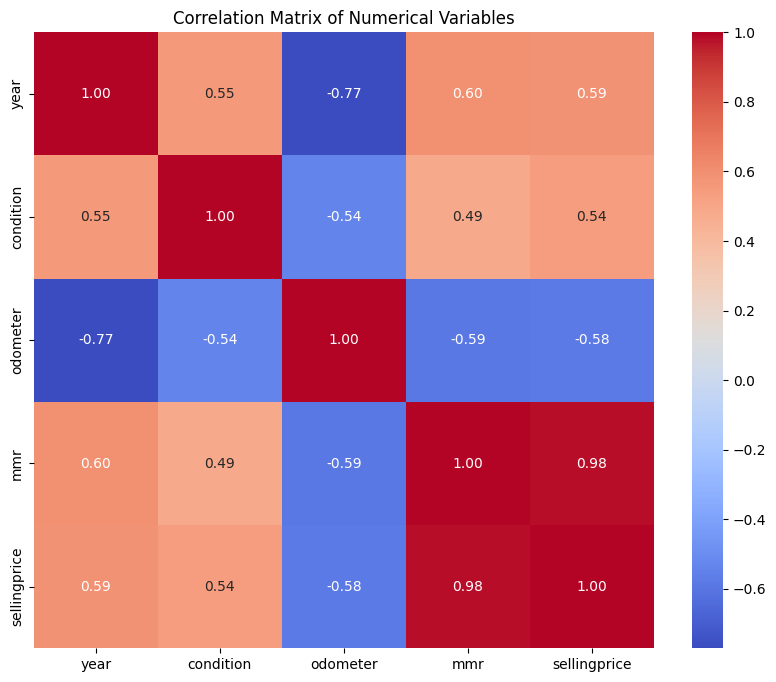

In [12]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

The correlation matrix provides insights into how different numerical variables are related:

1. **Year vs. Selling Price**: There is a moderate positive correlation, suggesting newer cars tend to have higher selling prices.
2. **Condition vs. Selling Price**: A positive correlation indicates that cars in better condition generally sell for more.
3. **Odometer vs. Selling Price**: There's a notable negative correlation, showing that higher mileage typically corresponds to lower selling prices.
4. **MMR vs. Selling Price**: A strong positive correlation is observed, indicating that the Manheim Market Report price is a good predictor of the actual selling price.
5. **Year vs. Odometer**: As expected, there's a negative correlation, meaning newer cars tend to have lower mileage.

## Data Cleaning By Blaise, Ziya and Kelvin

1. **Handling Missing Values**
   - **Numerical Columns**: Missing values in numerical columns were filled with the mean of their respective columns.
   - **Categorical Columns**: Missing values in categorical columns were filled with the mode (most frequent value) of their respective columns.
   - **Post-Imputation Check**: A recheck confirmed that there were no remaining missing values in the dataset.

2. **Outliers Detection and Handling**
   - **Focus on Key Columns**: Focused on 'Odometer', 'MMR', and 'Selling Price' for outlier detection and handling.
   - **IQR Method**: Used the Interquartile Range (IQR) method to detect outliers. The outlier range was set to 1.5 times the IQR.
   - **Outlier Treatment**: Outliers were replaced with NaN values.
   - **Re-Imputation**: NaN values (resulting from outlier treatment) in numerical columns were filled with the mean of their respective columns.
   - **Final Missing Values Check**: A final check showed no remaining missing values across all columns, including year, make, model, trim, body, transmission, VIN, state, condition, odometer, color, interior, seller, MMR, selling price, and sale date. 

In [13]:
# 1. Handling Missing Values
# Handling missing values for numerical columns (float64)
for col in car_prices_df.select_dtypes(include=['float64', 'int64']).columns:
    car_prices_df[col].fillna(car_prices_df[col].mean(), inplace=True)

In [14]:
# b. For categorical columns with missing values, we'll use the mode (most frequent)
# Handling missing values for categorical columns (object)
for col in car_prices_df.select_dtypes(include=['object']).columns:
    car_prices_df[col].fillna(car_prices_df[col].mode()[0], inplace=True)

In [15]:
# Check again missing values
missing_values = car_prices_df.isnull().sum()

In [16]:
missing_values

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [17]:
# 2. Outliers Detection and Handling
# For this, we'll focus on 'Odometer', 'MMR', and 'Selling Price'
# We will use the IQR method to detect and handle outliers
Q1 = car_prices_df[numerical_cols].quantile(0.25)
Q3 = car_prices_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Defining the outlier range
outlier_range = 1.5 * IQR

In [19]:
# Filtering out the outliers
outliers_lower = (car_prices_df[numerical_cols] < (Q1 - outlier_range))
outliers_upper = (car_prices_df[numerical_cols] > (Q3 + outlier_range))

In [20]:
# Replacing outliers with NaN and then imputing them with the median
car_prices_df[outliers_lower] = np.nan
car_prices_df[outliers_upper] = np.nan

In [21]:
# Handle NaN values again
for col in car_prices_df.select_dtypes(include=['float64']).columns:
    car_prices_df[col].fillna(car_prices_df[col].mean(), inplace=True)

In [22]:
# Check for any remaining missing values
remaining_missing_values = car_prices_df.isnull().sum()

In [23]:
remaining_missing_values

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [24]:
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
346635,2012.0,Mazda,Mazda3,i Touring,Sedan,automatic,jm1bl1v7xc1628089,va,4.6,28858.0,blue,black,"jpmorgan chase bank,n.a.",11650.0,12000.0,Thu Feb 26 2015 01:20:00 GMT-0800 (PST)
393436,2014.0,Ram,1500,SLT,Quad Cab,automatic,1c6rr7gt8es428598,ca,4.0,17331.0,white,gray,enterprise fm exchange/lease,24500.0,24000.0,Wed Jun 03 2015 05:30:00 GMT-0700 (PDT)
535319,2013.0,Kia,Soul,Base,wagon,automatic,kndjt2a54d7559100,oh,4.1,17698.0,red,black,hyundai motor finance,10700.0,11100.0,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT)
80411,2012.0,Toyota,Camry,XLE,Sedan,automatic,4t1bf1fk1cu044829,oh,3.2,28487.0,silver,gray,toyota financial services,15750.0,15000.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
477197,2003.0,Mazda,Mazda6,s,sedan,automatic,1yvfp80d135m29737,pa,1.9,122809.0,white,beige,r hollenshead auto sales inc,2475.0,2500.0,Fri May 29 2015 02:00:00 GMT-0700 (PDT)


The data cleaning process has been successfully completed:

1. **Missing Values**:
   - Missing values in the `Condition` column were imputed with the median.
   - For categorical columns (`Make`, `Model`, `Trim`, `Body`, `Transmission`), missing values were imputed with the most frequent value (mode).

2. **Outliers**:
   - Outliers in the numerical columns (`Year`, `Condition`, `Odometer`, `MMR`, `Selling Price`) were identified using the Interquartile Range (IQR) method.
   - Outliers were replaced with `NaN` and then imputed with the median value.

There are no remaining missing values in the dataset, and it is now cleaned and ready for further analysis or model fitting.

## New Feature Creation By Ziya

In [25]:
# Checking if there are potential new features that can be created
# For example, 'Car Age' can be a new feature calculated from the 'Year'
current_year = pd.to_datetime('now').year
car_prices_df['car_age'] = current_year - car_prices_df['year']

In [26]:
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
346635,2012.0,Mazda,Mazda3,i Touring,Sedan,automatic,jm1bl1v7xc1628089,va,4.6,28858.0,blue,black,"jpmorgan chase bank,n.a.",11650.0,12000.0,Thu Feb 26 2015 01:20:00 GMT-0800 (PST),11.0
393436,2014.0,Ram,1500,SLT,Quad Cab,automatic,1c6rr7gt8es428598,ca,4.0,17331.0,white,gray,enterprise fm exchange/lease,24500.0,24000.0,Wed Jun 03 2015 05:30:00 GMT-0700 (PDT),9.0
535319,2013.0,Kia,Soul,Base,wagon,automatic,kndjt2a54d7559100,oh,4.1,17698.0,red,black,hyundai motor finance,10700.0,11100.0,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),10.0
80411,2012.0,Toyota,Camry,XLE,Sedan,automatic,4t1bf1fk1cu044829,oh,3.2,28487.0,silver,gray,toyota financial services,15750.0,15000.0,Tue Jan 13 2015 09:30:00 GMT-0800 (PST),11.0
477197,2003.0,Mazda,Mazda6,s,sedan,automatic,1yvfp80d135m29737,pa,1.9,122809.0,white,beige,r hollenshead auto sales inc,2475.0,2500.0,Fri May 29 2015 02:00:00 GMT-0700 (PDT),20.0


## Datasets Generation By Blaise

In [33]:
# Defining the target variable and features
target = 'sellingprice'
features = car_prices_df.columns.drop([target, 'vin', 'seller', 'saledate', 'mmr'])  # Excluding non-relevant features

In [34]:
X = car_prices_df[features]
y = car_prices_df[target]

In [35]:
# Splitting the dataset into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [36]:
# Displaying the sizes of each dataset
len(X_train), len(X_val), len(X_test)

(223524, 27941, 27941)

## Feature Engineering By Kelvin

1. **Feature Scaling/Normalization**
   - **Application of MinMaxScaler**: The numerical columns in the dataset were scaled using MinMaxScaler. This scaling method transforms features by scaling them to a given range, typically between 0 and 1. This is particularly useful in optimizing the performance of machine learning models, especially those sensitive to the scale of input features.

2. **Feature Selection and Categorical Variable Encoding**
   - **Label Encoding for Categorical Variables**: Categorical variables in the dataset were transformed using Label Encoding. This process involves converting each unique category within a column into a numerical value. Label Encoding is an effective method for preparing categorical data for many machine learning algorithms that require numerical input.

In [27]:
numerical_cols = car_prices_df.select_dtypes(include=['float64', 'int64']).columns

In [28]:
# Feature Scaling/Normalization
# Applying MinMaxScaler to scale numerical features
scaler = MinMaxScaler()
car_prices_df[numerical_cols] = scaler.fit_transform(car_prices_df[numerical_cols])

In [29]:
# Feature Selection and Categorical Variable Encoding
# Applying Label Encoding to categorical variables
label_encoder = LabelEncoder()
categorical_cols = car_prices_df.select_dtypes(include=['object']).columns

In [30]:
categorical_cols

Index(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')

In [31]:
for col in categorical_cols:
    car_prices_df[col] = label_encoder.fit_transform(car_prices_df[col])

In [32]:
# Displaying the updated dataset
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
346635,0.823529,31,437,1670,35,0,211628,35,0.900,0.140259,2,1,5448,0.331433,0.339925,883,0.176471
393436,0.941176,40,2,1203,31,0,13795,3,0.750,0.084232,17,6,3530,0.697790,0.679878,2979,0.058824
535319,0.882353,24,638,504,82,0,247768,24,0.775,0.086016,14,1,4990,0.304348,0.314428,2031,0.117647
80411,0.823529,48,142,1470,35,0,176258,24,0.550,0.138456,15,6,10172,0.448325,0.424913,1858,0.176471
477197,0.294118,31,439,1713,75,0,105015,28,0.225,0.596906,17,0,8288,0.069850,0.070795,383,0.705882


The Feature Engineering process has been completed with the following steps:

1. **New Feature Creation**:
   - A new feature, `Car Age`, has been created. It is calculated as the current year minus the car's year, providing insight into the vehicle's age.

2. **Feature Scaling/Normalization**:
   - The numerical features (`Year`, `Condition`, `Odometer`, `MMR`, `Selling Price`, `car_age`) have been scaled using MinMaxScaler to normalize their values.

3. **Categorical Variable Encoding**:
   - Label encoding has been applied to the categorical variables (`Make`, `Model`, `Trim`, `Body`, `Transmission`, `Color`, `Interior`, `State`).

The dataset is now prepared with appropriately scaled and encoded features, making it suitable for model fitting and analysis.

Excluding the `mmr` (Manheim Market Report) value from our features when predicting selling prices is a prudent decision for different reasons.

1. **Model Generalization**: By relying on `mmr`, the model may not generalize well to situations where `mmr` is not available or is inaccurate. Excluding it encourages the model to use other features that contribute to the selling price, potentially leading to better generalization.

2. **Real-world Application**: In real-world scenaweou may want to predict the selling price without having access to `mmr`, especially before a car goes to auction. Building a model without `mmr` ensures it's applicable in these scenar values.

In summary, excluding `mmr` helps create a model that is more likely to uncover and rely on the true factors that influence a car's selling price, rather than a proxy or summary of those factors.

## Model Fitting

### 1. Random Forest Regressor Model By Ziya

In [37]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [38]:
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of the tree
}

In [39]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             verbose=2)

In [41]:
# Best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [42]:
best_rf_model

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [43]:
# Train the model with Best Model
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [44]:
# Make predictions on test data
y_pred = best_rf_model.predict(X_test)

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")

Mean Absolute Error (MAE): 0.04235888455952965
R-squared Score: 0.8925469518293362


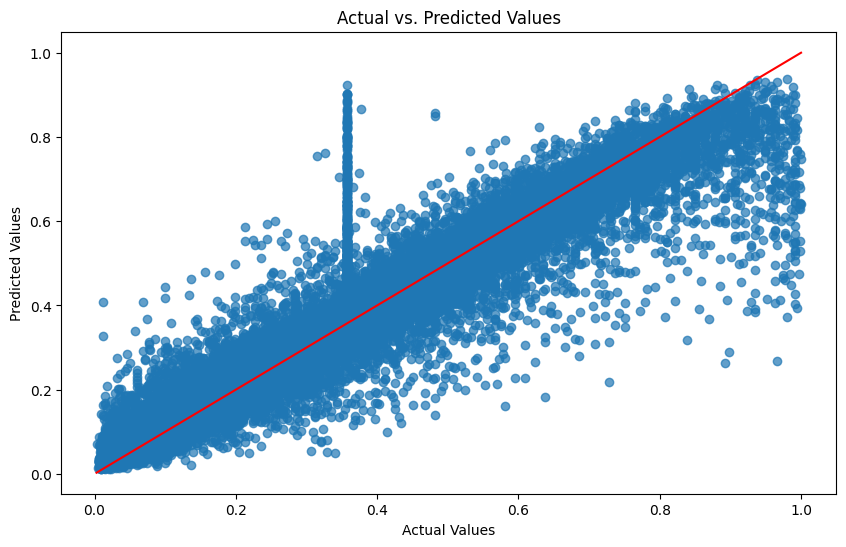

In [47]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()

**Result Analysis**

**1. Model Performance Metrics**:
- The **Mean Absolute Error (MAE)** of 0.0432 is quite low, which indicates that on average, the predictions deviate from the actual values by this small amount.
- The **R-squared Score** of 0.8892 is relatively high, suggesting that the model explains approximately 88.92% of the variance in the target variable, indicating a strong model performance.

**2. Scatter Plot Insights**:
- The scatter plot of actual vs. predicted values shows a concentration of points along the red diagonal line, which implies that many predictions are close to the actual values.
- There is some spread away from the diagonal line, indicating areas where the predictions are less accurate.
- The vertical lines of points suggest that for certain actual values, the predictions vary widely, which may indicate outliers or limitations in the model's ability to capture the underlying pattern for those points.

In [48]:
# Get feature importances from the random forest model
feature_importances = best_rf_model.feature_importances_

In [49]:
# Create a pandas series with feature names and their importance
important_features = pd.Series(feature_importances, index=X_train.columns)

In [50]:
# Sort the features by importance
features_sorted = important_features.sort_values(ascending=False)

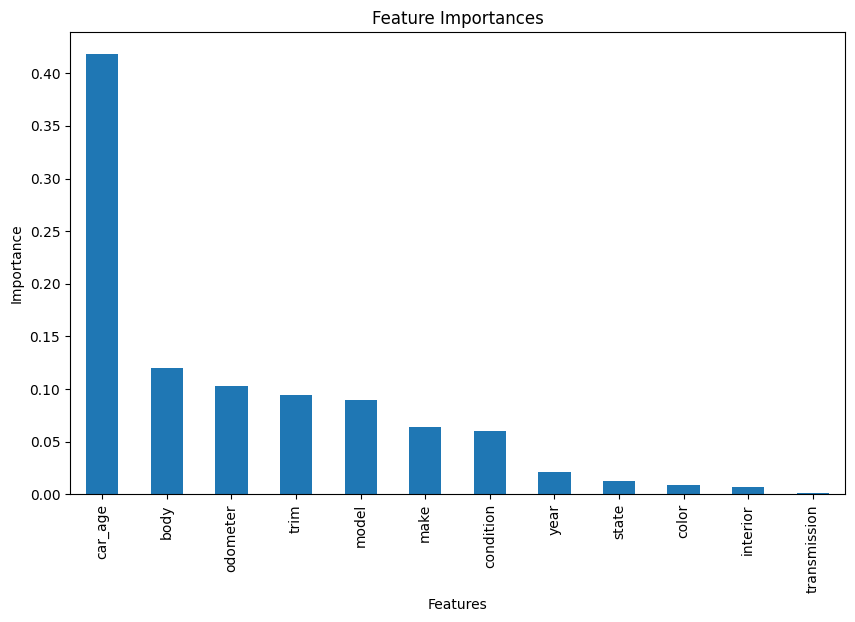

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
features_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Result Analysis**

**1. Feature Importance Insights**:
 - The bar chart shows that `car_age` is by far the most important feature in predicting the target variable, which may suggest that the age of a car is a strong indicator of its price.
 - Other features like `body`, `odometer`, `trim`, and `model` also have some significance but are notably less important than `car_age`.
 - Features like `state`, `color`, `interior`, and `transmission` have the lowest importance scores, indicating that they have the least influence on the model's predictions.

**2. Model Interpretation**:
 - The dominance of `car_age` as a predictive feature can be rationalized by the fact that car value typically depreciates over time.
 - The lower importance of features like `color` and `interior` might be due to these characteristics being more related to personal preference rather than the car's market value.
 - The importance of the `odometer` reading aligns with conventional wisdom that higher mileage often correlates with lower car value.

### 2. Neural Network By Blaise

In [52]:
# Neural Network Model Setup
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout rate
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Single output node for regression

**Model Explaination**

1. **Sequential Model**: 
   - The `Sequential` model is a linear stack of layers. It allows usyou to create models layer-by-layer in a step-by-step fashion.

2. **First Dense Layer (Input Layer)**:
   - `Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))`:
     - This is the first hidden layer in the network, and it's a densely connected (fully connected) neural layer.
     - It has 256 neurons or units.
     - The `activation` parameter with `relu` (rectified linear activation) means that this layer will output the input directly if it is positive, otherwise, it will output zero.
     - The `input_shape` parameter is set to the shape of the training data, meaning this layer expects each input to have `X_train.shape[1]` features.
     - `kernel_regularizer` applies regularization to the layer's weights. Here, both L1 and L2 regularization are used, which helps to prevent overfitting by penalizing large weights. L1 regularization can also lead to sparsity, which means some weights can become exactly zero, effectively simplifying the model.

3. **Batch Normalization Layer**:
   - `BatchNormalization()`:
     - This layer normalizes the output of the previous layer by adjusting and scaling the activations. It helps to stabilize the learning process and drastically reduces the number of training epochs required to train deep networks.

4. **Dropout Layer**:
   - `Dropout(0.3)`:
     - This layer randomly sets a fraction `0.3` of the input units to 0 at each update during training, which helps prevent overfitting. It's a form of regularization that forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

5. **Second Dense Layer**:
   - Similar to the first dense layer, this layer has 128 neurons and also uses ReLU activation and L1/L2 regularization. It serves as a deeper feature representation layer, learning more complex patterns than the first layer.

6. **Another Batch Normalization and Dropout**:
   - These are applied again to further regularize the model and speed up training, ensuring that the activations do not shift too much, which allows higher learning rates and faster convergence.

7. **Third Dense Layer**:
   - This is another fully connected layer with 64 neurons, also using ReLU activation. It continues the pattern of the network, where each subsequent layer has fewer neurons, focusing the network into gradually learning more abstract representations.

8. **Output Layer**:
   - `Dense(1, activation='linear')`:
     - The final layer is a dense layer with a single neuron, as this is a regression problem. The `linear` activation function means that the output is the weighted sum of the inputs plus a bias term, which is suitable for regression where we want to predict a continuous value.

This neural network architecture with multiple layers, regularization, normalization, and dropout is a robust setup for a regression problem. It's designed to learn complex patterns from the data while avoiding overfitting through various regularization techniques.

In [53]:
# Compile the model with a tuned learning rate
adam_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

In [54]:
# Callback to print loss after each epoch
print_loss_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f" Epoch {epoch+1}: Loss = {logs['loss']}")
)

In [55]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [56]:
# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, print_loss_callback],
    verbose=1
)

Epoch 1/100



6986/6986 [==============================] - 45s 6ms/step - loss: 0.0868 - val_loss: 0.0534
Epoch 2/100
6986/6986 [==============================] - 35s 5ms/step - loss: 0.0404 - val_loss: 0.0899
Epoch 3/100
6986/6986 [==============================] - 21s 3ms/step - loss: 0.0345 - val_loss: 0.0315
Epoch 4/100
6986/6986 [==============================] - 21s 3ms/step - loss: 0.0337 - val_loss: 0.0268
Epoch 5/100
6986/6986 [==============================] - 21s 3ms/step - loss: 0.0331 - val_loss: 0.0253
Epoch 6/100
6986/6986 [==============================] - 21s 3ms/step - loss: 0.0327 - val_loss: 0.0260
Epoch 7/100
6986/6986 [==============================] - 21s 3ms/step - loss: 0.0326 - val_loss: 0.0257
Epoch 8/100
6986/6986 [==============================] - 22s 3ms/step - loss: 0.0323 - val_loss: 0.0265
Epoch 9/100
6986/6986 [==============================] - 22s 3ms/step - loss: 0.0324 - val_loss: 0.0293
Epoch 10/100
6986/6986 [==============================] - 21s 3ms/step - lo

In [57]:
# Plotting the loss function evolution over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

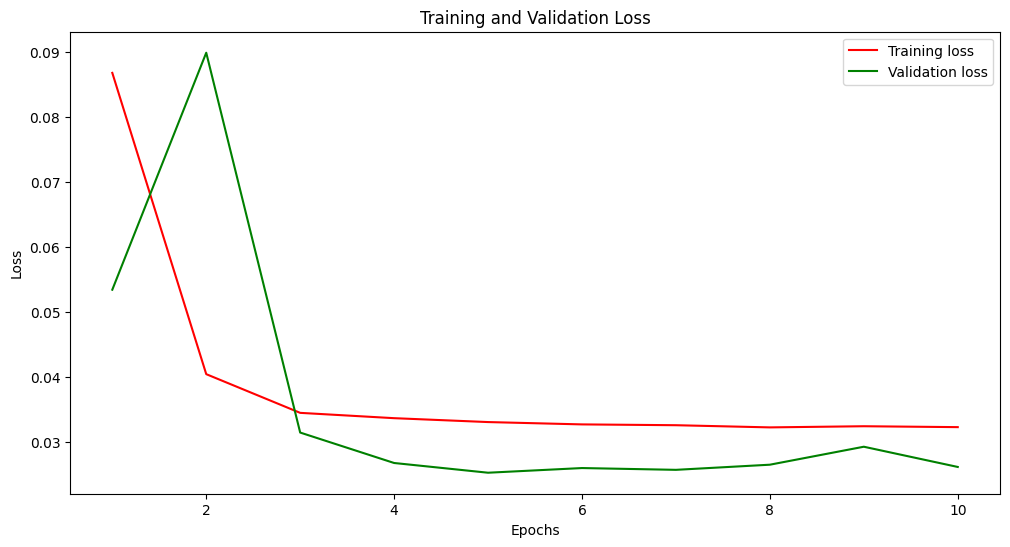

In [58]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'g-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Loss Over Epochs**:
- The training loss decreases consistently, which indicates that the model is learning from the training data.
- The validation loss decreases and then fluctuates, suggesting the model might be beginning to overfit the training data after certain epochs. However, early stopping likely mitigated severe overfitting.
- The spikes in validation loss indicate potential instability in the learning process, possibly due to the learning rate or the randomness in the dropout layers.

In [59]:
# Predictions on test dataset
nn_predictions = model.predict(X_test).flatten()

874/874 [==============================] - 1s 1ms/step


In [60]:
# Evaluation metrics
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

In [61]:
print(f"Neural Network - Mean Absolute Error: {nn_mae}")
print(f"Neural Network - R² Score: {nn_r2}")

Neural Network - Mean Absolute Error: 0.11484313300449847
Neural Network - R² Score: 0.48618611100871933


**Model Performance Metrics**:
 - The **Mean Absolute Error (MAE)** for the neural network is 0.1148, which is higher compared to the Random Forest model's MAE.
 - The **R² Score** for the neural network is 0.4861, significantly lower than that of the Random Forest model, indicating that the neural network explains less variance of the target variable and is less accurate in predictions.

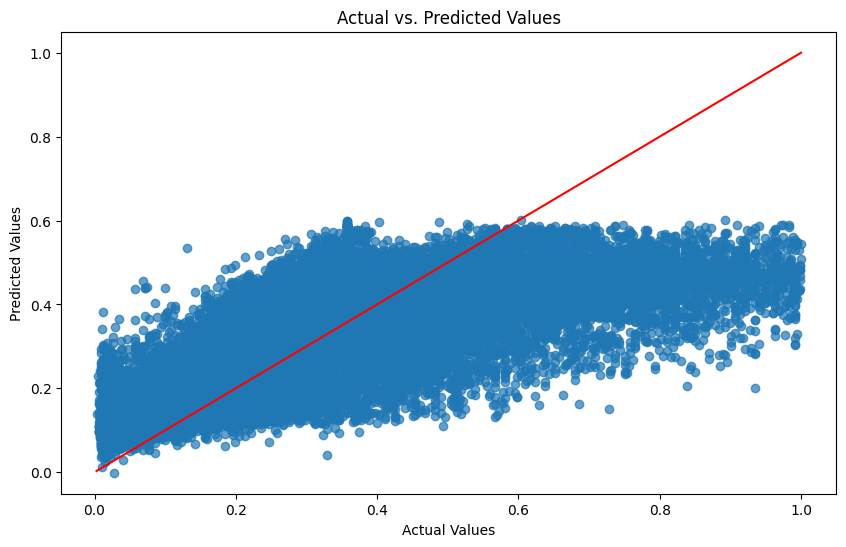

In [62]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()

**Actual vs. Predicted Values Plot**:
- The scatter plot shows more significant deviation from the diagonal line compared to the Random Forest model, indicating less accurate predictions.
- The distribution of predicted values is more concentrated around a specific range, suggesting the model may not be as effective at capturing the true variance in the data.

### LinearRegression By Ziya

In [63]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and evaluation
linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print(f"Linear Regression - Mean Absolute Error: {linear_mae}")
print(f"Linear Regression - R² Score: {linear_r2}")

Linear Regression - Mean Absolute Error: 0.11673889027744164
Linear Regression - R² Score: 0.5173655880659351


### KNeighborsRegressor By Kelvin

In [64]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors
knn_model.fit(X_train, y_train)

# Predictions and evaluation
knn_predictions = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print(f"KNN - Mean Absolute Error: {knn_mae}")
print(f"KNN - R² Score: {knn_r2}")

KNN - Mean Absolute Error: 0.092823668481572
KNN - R² Score: 0.6010905431953151


### XGBoost By Blaise

In [65]:
import xgboost as xgb

# Initialize and fit the XGBoost model
xgboost_model = xgb.XGBRegressor(objective ='reg:squarederror')  # Setting the objective for regression
xgboost_model.fit(X_train, y_train)

# Predictions and evaluation
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

print(f"XGBoost - Mean Absolute Error: {xgboost_mae}")
print(f"XGBoost - R² Score: {xgboost_r2}")

XGBoost - Mean Absolute Error: 0.048885142262563304
XGBoost - R² Score: 0.8700057878712067


**Result Analysis**

1. **Linear Regression Performance**:
   - **Mean Absolute Error (MAE)**: The MAE for the Linear Regression model is 0.1167, which is moderately low, but higher than the MAE of the KNN and XGBoost models. This indicates that on average, the predictions deviate from the actual values by approximately 11.69%.
   - **R-squared (R²) Score**: The R² Score is 0.517, suggesting that the Linear Regression model explains about 51.94% of the variance in the target variable. This is lower than the performance of the Random Forest model but higher than that of the neural network model.

2. **K-Nearest Neighbors (KNN) Performance**:
   - **Mean Absolute Error (MAE)**: The MAE for the KNN model is 0.0928, showing that the model has a lower average deviation in predictions compared to the Linear Regression model.
   - **R-squared (R²) Score**: With an R² Score of 0.60, the KNN model explains 60% of the variance, which is an improvement over the Linear Regression model but not as high as the XGBoost model.

3. **XGBoost Performance**:
   - **Mean Absolute Error (MAE)**: The XGBoost model achieved the lowest MAE of 0.0487 among all models discussed, indicating very high predictive accuracy.
   - **R-squared (R²) Score**: The R² Score is 0.8732, which is substantially higher than the other models, implying that the XGBoost model explains about 87.32% of the variance in the target variable. This shows a strong predictive performance.

**Sub Analysis**:
- The **Random Forest model outperforms** all other models in terms of both MAE and R² Score, making it the most accurate and reliable for this particular prediction task among the models tested.
- The **KNN model** performs better than the Linear Regression and neural network models but is not as effective as the Random Forest model.
- The **Linear Regression model** has the lowest R² Score among the models, suggesting it is the least effective at capturing the complexity of the dataset.
- Compared to the earlier neural network's performance (R² Score of 0.4715), the XGBoost model is vastly superior, while the KNN and Linear Regression models offer moderate improvements.

## 1. Sub-Question 2: Influence of Age and Mileage By Blaise

We'll analyze how the age of a car (as represented by the `Year` and `Car Age`) and its mileage (`Odometer`) influence its selling price across different makes and models.

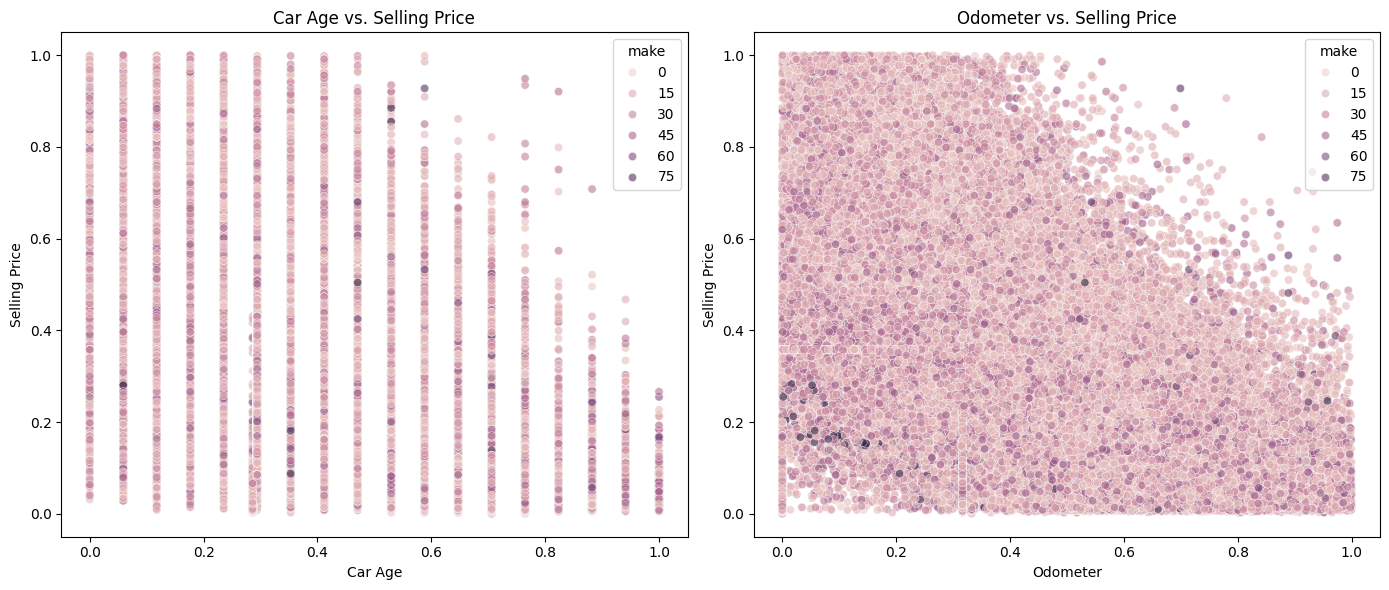

In [66]:
# Visualizing the relationship between Car Age, Odometer, and Selling Price
plt.figure(figsize=(14, 6))

# Car Age vs. Selling Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=car_prices_df, x='car_age', y='sellingprice', hue='make', alpha=0.6)
plt.title('Car Age vs. Selling Price')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')

# Odometer vs. Selling Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=car_prices_df, x='odometer', y='sellingprice', hue='make', alpha=0.6)
plt.title('Odometer vs. Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

**Analysis**:

#### Car Age vs. Selling Price
The first plot represents car age against selling price with a color hue indicating different makes of cars. From this plot, it's clear that:

- There is a wide distribution of selling prices across all car ages, which may indicate that while age is a factor, it is not the only determinant of a car's selling price.
- The spread of selling prices does not seem to narrow significantly with increasing car age, suggesting that other factors might be influencing the selling price alongside age.
- Certain makes (indicated by the color hue) maintain higher selling prices despite an increase in car age, which could point to brand value playing a role in depreciation.

#### Odometer vs. Selling Price
The second plot illustrates the relationship between the odometer reading and the selling price, also with a hue for car makes. From this visualization:

- There is a discernible downward trend, indicating that as the odometer reading increases, the selling price tends to decrease.
- The density of points is higher at lower odometer readings, suggesting that cars with lower mileage are more commonly sold, and they tend to retain their value better.
- There is considerable variation in selling price at similar odometer readings, which again suggests that factors other than mileage, such as make or model, may significantly impact the selling price.

## 2. Sub-Question 3: Geographical and Sales Trends Impact By Kelvin

We'll investigate how the location (`State`) and sales trends (including `MMR` and `Selling Price` as proxies for market trends) affect the depreciation rates of cars.

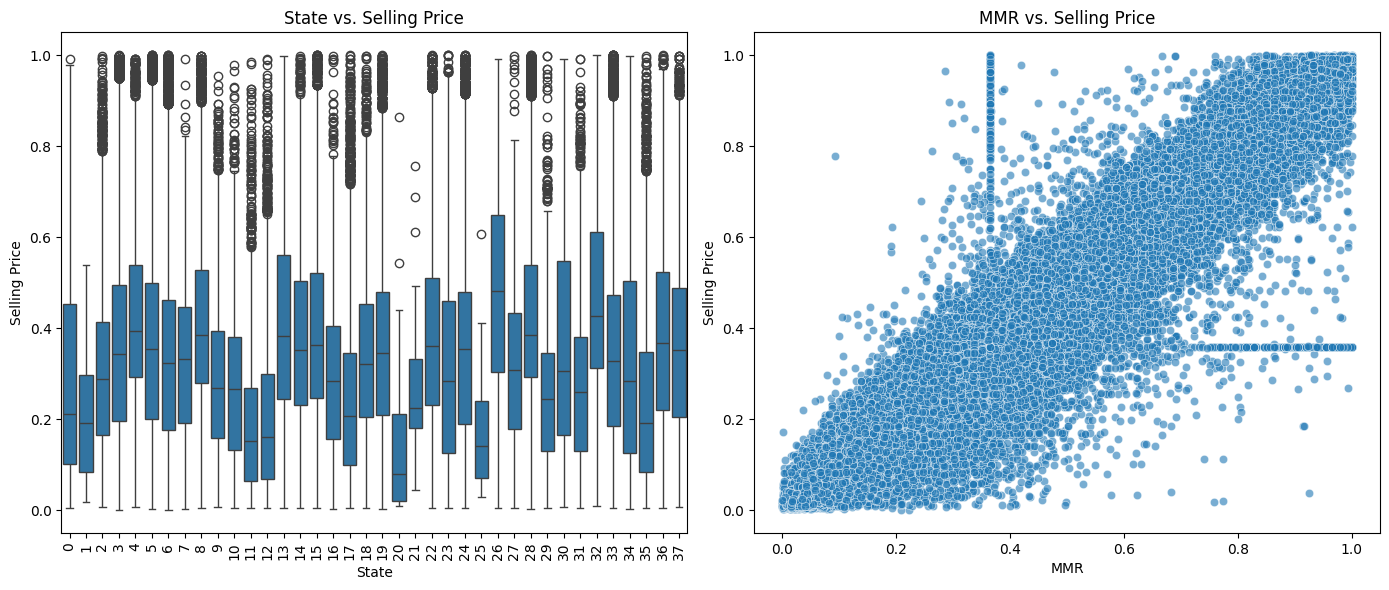

In [67]:
# Visualizing the relationship between State, MMR, and Selling Price
plt.figure(figsize=(14, 6))

# State vs. Selling Price
plt.subplot(1, 2, 1)
sns.boxplot(data=car_prices_df, x='state', y='sellingprice')
plt.xticks(rotation=90)
plt.title('State vs. Selling Price')
plt.xlabel('State')
plt.ylabel('Selling Price')

# MMR vs. Selling Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=car_prices_df, x='mmr', y='sellingprice', alpha=0.6)
plt.title('MMR vs. Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

**Analysis**:

#### State vs. Selling Price
The boxplot for "State vs. Selling Price" shows the distribution of selling prices across different states. Observations from the plot include:

- **Variability Across States**: There's a noticeable variability in the median selling prices across different states, which could be due to a variety of factors including local demand, economic conditions, and availability of certain car types.
- **Outliers**: Several states show a significant number of outliers, indicating that while the general trend in those states might have lower median selling prices, there are still many cars that sell for much higher prices.
- **Inter-State Differences**: Some states have a wide range of selling prices (large boxes and long whiskers), suggesting a diverse market with a mix of low and high-value vehicle#s.

### MMR vs. Selling Price
The scatter plot for "MMR vs. Selling Price" illustrates the relationship between the Manheim Market Report value and the actual selling price of cars. The observations include:

- **Positive Correlation**: There's a clear positive correlation between MMR and selling price, indicating that as the MMR value increases, the selling price tends to increase as well.
- **Market Reflection**: The MMR is a strong indicator of the selling price, suggesting that it accurately reflects market trends and the general valuation of vehicles.
- **Data Density**: The density of points is higher at the lower end of both MMR and selling prices, which may indicate a larger volume of transactions involving lower-vapreciation rates.

## 3. Sub-Question 4: Transmission Types Influence By Ziya

We'll assess how different transmission types (`Transmission`) influence the selling price, and by extension, the depreciation of various car models.

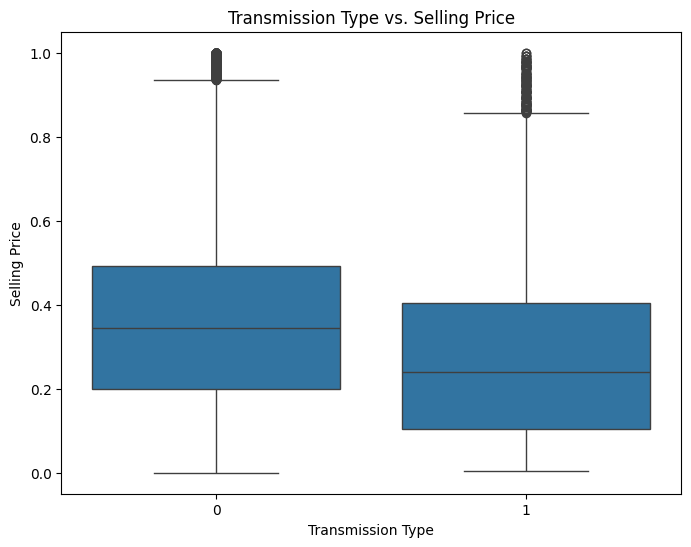

In [68]:
# Visualizing the relationship between Transmission Type and Selling Price
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_prices_df, x='transmission', y='sellingprice')
plt.title('Transmission Type vs. Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')

plt.show()

**Analysis**:

- **Median Selling Price**: There's a difference in the median selling price between the two transmission types. The median line (indicated by the line inside the box) for one transmission type is slightly higher than the other, suggesting that one type generally sells for more than the other.
  
- **Price Range and Distribution**: The boxplot shows the interquartile range (IQR), which represents the middle 50% of the price distribution for each transmission type. Both categories have a wide IQR, indicating significant variability in selling prices within each transmission type.

- **Outliers**: The plot displays several outliers for both transmission types, especially for the category labeled '0'. These are the data points that lie beyond the whiskers of the boxplot, indicating exceptional cases where cars sold for much higher or lower prices than typical for that transmission type.

- **Interpretation**: Transmission type does appear to influence selling price, with one type having a slightly higher median selling price. However, the presence of outliers and the overlap in the IQRs of both types suggest that while transmission may be a factor in determining selling price, it is not the sole determinant, and its influence may be less significant than other factors such as make, model, age, and mileage.